In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
cons = []
dbFile = 'sims_featureScheduler_runs1.6/potential_schedulers/rolling_exgal_mod2_dust_sdf_0.80_v1.6_10yrs.db'
cons.append(db.OpsimDatabase(dbFile))
outDir='rolling_plot'
resultsDb = db.ResultsDb(outDir=outDir)

dbFile = 'sims_featureScheduler_runs1.6/potential_schedulers/baseline_nexp1_v1.6_10yrs.db'
cons.append(db.OpsimDatabase(dbFile))

runnames = ['rolling_exgal_mod2_dust_sdf_0.80_v1.6',
           'baseline_nexp1_v1.6']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint note not like "DD%%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 2123326 visits
Running:  ['rolling_exgal_mod2_dust_sdf_0_80_v1_6_Count_filter_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "DD%%"" constraint now.
monopole: 683.114  dipole: lon: 0.02935, lat: -72.6555, amp: 138.402
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint note not like "DD%%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 2118631 visits
Running:  ['baseline_nexp1_v1_6_Count_filter_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "DD%%"" constraint now.
monopole: 673.371  dip

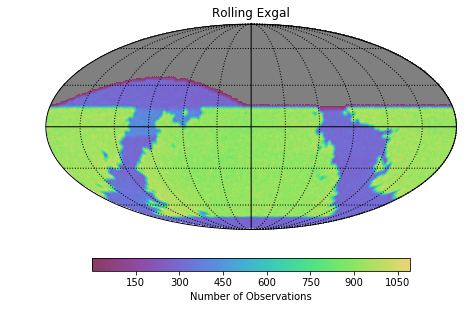

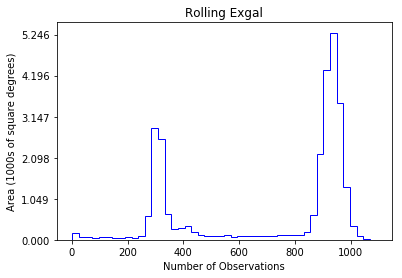

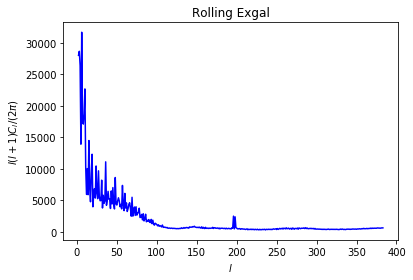

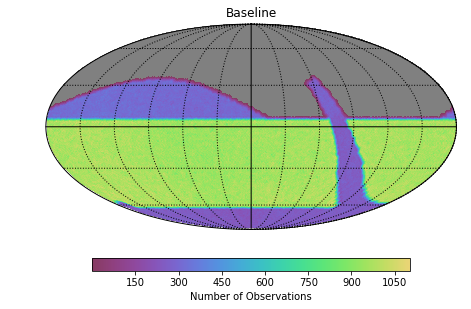

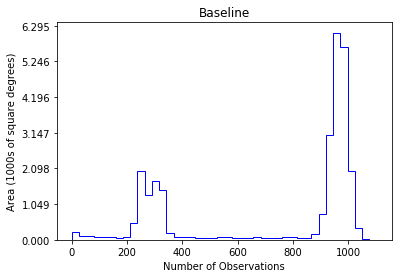

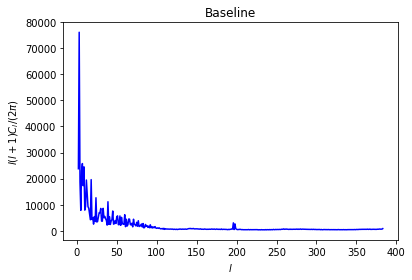

In [3]:
titles = ['Rolling Exgal', 'Baseline']
for conn, runName, title in zip(cons, runnames, titles):
    bundleList = []
    sql = 'note not like "DD%%"'
    metric = metrics.CountMetric('filter')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlabel': 'Number of Observations', 'title':title}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=runName))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 222902 visits
Running:  ['rolling_exgal_mod2_dust_sdf_0_80_v1_6_Count_filter_night_gt_1278_375000_and_night_lt_1643_625000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 1278.375000 and night < 1643.625000 and note not like "DD%"" constraint now.
monopole: 73.9271  dipole: lon: -57.0639, lat: -67.7219, amp: 8.80956
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 222315 visits
Running:  ['baseline_nexp1_v1_6_Count_filter_night_gt_

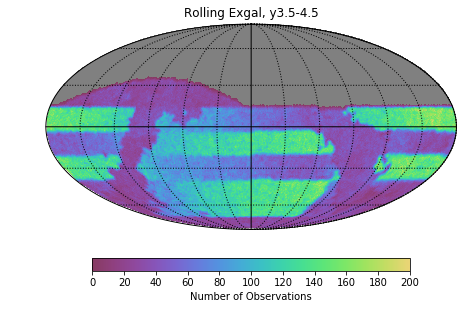

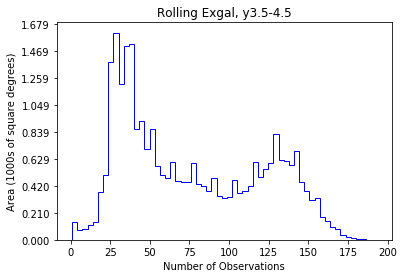

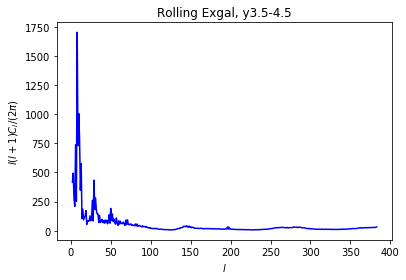

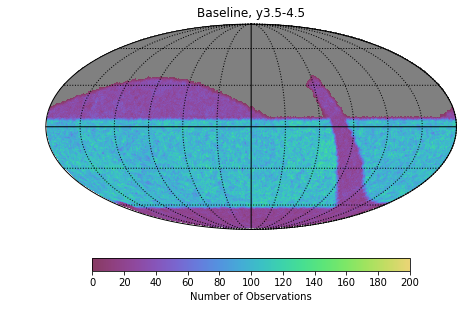

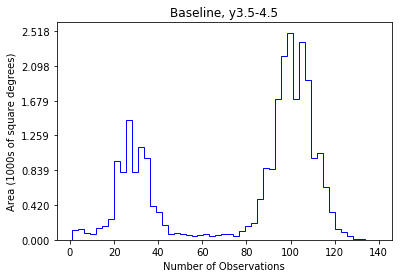

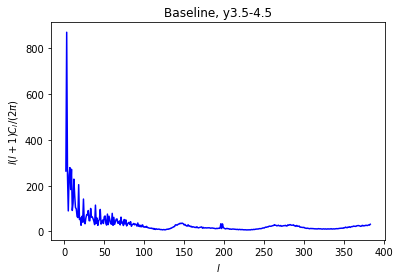

In [4]:
titles = ['Rolling Exgal, y3.5-4.5', 'Baseline, y3.5-4.5']
for conn, runName,title in zip(cons, runnames, titles):
    bundleList = []
    sql = 'night > %f and night < %f and note not like "DD%%"' % ((365.25*3.5), (365.25*4.5) )
    metric = metrics.CountMetric('filter')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlabel': 'Number of Observations', 'colorMin': 0, 'colorMax': 200,
               'title': title}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=runName))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)